# 36일차
## 이미지 처리 딥러닝

## 전이학습
### 유명한 CNN 아키텍처
- https://m.blog.naver.com/takion7/221633332572
>- LeNet
>-AlexNet
>-Inception (GoogleNet)
>-VGGNet (VGG16)
>-ResNet
>-Xception (Inception 기반)

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras

In [2]:
dir(keras.applications)

['DenseNet121',
 'DenseNet169',
 'DenseNet201',
 'EfficientNetB0',
 'EfficientNetB1',
 'EfficientNetB2',
 'EfficientNetB3',
 'EfficientNetB4',
 'EfficientNetB5',
 'EfficientNetB6',
 'EfficientNetB7',
 'InceptionResNetV2',
 'InceptionV3',
 'MobileNet',
 'MobileNetV2',
 'MobileNetV3Large',
 'MobileNetV3Small',
 'NASNetLarge',
 'NASNetMobile',
 'ResNet101',
 'ResNet101V2',
 'ResNet152',
 'ResNet152V2',
 'ResNet50',
 'ResNet50V2',
 'VGG16',
 'VGG19',
 'Xception',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 '_sys',
 'densenet',
 'efficientnet',
 'imagenet_utils',
 'inception_resnet_v2',
 'inception_v3',
 'mobilenet',
 'mobilenet_v2',
 'mobilenet_v3',
 'nasnet',
 'resnet',
 'resnet50',
 'resnet_v2',
 'vgg16',
 'vgg19',
 'xception']

In [3]:
model = keras.applications.vgg16.VGG16(include_top=True, weights='imagenet') # input_shape=(224, 224, 3)

In [4]:
model.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

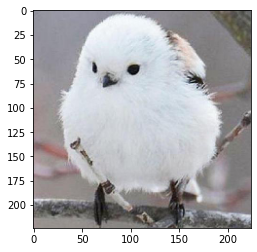

In [5]:
from tensorflow.keras.preprocessing.image import load_img, img_to_array

bird = load_img('bird.jpg', target_size=(224, 224))
bird = img_to_array(bird)
plt.imshow(bird/255.)

In [6]:
from tensorflow.keras.applications.vgg16 import preprocess_input

input_image = np.expand_dims(bird, axis=0) # (1,224,224,3)
input_image = preprocess_input(input_image)

input_image.shape, input_image.max(), input_image.min()

((1, 224, 224, 3), 151.061, -123.68)

In [7]:
result = model.predict(input_image)
result.shape

(1, 1000)

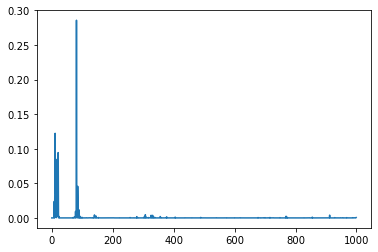

In [10]:
plt.plot(result[0])

In [8]:
np.argsort(result[0])[::-1][:10]

array([81, 11, 21, 13, 85, 19, 10, 17, 12,  8], dtype=int64)

In [9]:
from tensorflow.keras.applications.vgg16 import decode_predictions

decode_predictions(result, top=10)

40960/35363 [==================================] - 0s 0us/step


[[('n01796340', 'ptarmigan', 0.28579333),
  ('n01531178', 'goldfinch', 0.12230511),
  ('n01608432', 'kite', 0.09448763),
  ('n01534433', 'junco', 0.08501912),
  ('n01806567', 'quail', 0.045724753),
  ('n01592084', 'chickadee', 0.045359444),
  ('n01530575', 'brambling', 0.04195803),
  ('n01580077', 'jay', 0.039621074),
  ('n01532829', 'house_finch', 0.035429362),
  ('n01514859', 'hen', 0.023859749)]]

### 중간층 출력이미지 확인

In [11]:
for i,layer in enumerate(model.layers):
    print(i, layer.name)

0 input_1
1 block1_conv1
2 block1_conv2
3 block1_pool
4 block2_conv1
5 block2_conv2
6 block2_pool
7 block3_conv1
8 block3_conv2
9 block3_conv3
10 block3_pool
11 block4_conv1
12 block4_conv2
13 block4_conv3
14 block4_pool
15 block5_conv1
16 block5_conv2
17 block5_conv3
18 block5_pool
19 flatten
20 fc1
21 fc2
22 predictions


In [15]:
model.layers[0].name

'input_1'

In [12]:
#block3_conv1 = vgg16.get_layer('block3_conv1')
activation_model = keras.models.Model(inputs=model.input,
                        outputs=model.layers[7].output) # block3_conv1

In [13]:
result = activation_model.predict(input_image)
result.shape

(1, 56, 56, 256)

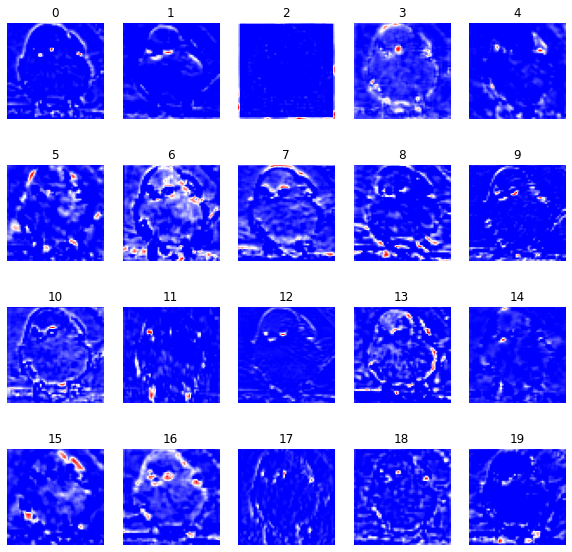

In [14]:
plt.figure(figsize=[10,10])

for i in range(20):
    plt.subplot(4,5,i+1)
    plt.imshow(result[0,:,:,i], cmap='bwr')
    plt.axis('off')
    plt.title(i)

### VGG16 전이학습

In [17]:
vgg16 = keras.applications.vgg16.VGG16(include_top=False, weights='imagenet',
                            input_shape=(150,150,3))

In [18]:
vgg16.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         [(None, 150, 150, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 150, 150, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 150, 150, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 75, 75, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 75, 75, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 75, 75, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 37, 37, 128)       0     

In [19]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [20]:
datagen = ImageDataGenerator(rescale=1/255)

generator = datagen.flow_from_directory('cats_and_dogs_small/train',
                    target_size=(150,150), batch_size=20, class_mode='binary')

X_train = np.zeros([2000,4,4,512])
y_train = np.zeros(2000)

for step in range(100): # 2000//20
    X_batch, y_batch = generator.next()
    pred = vgg16.predict(X_batch)
    
    X_train[20*step:20*(step+1)] = pred
    y_train[20*step:20*(step+1)] = y_batch
    print('.', end='')
    
X_train.shape, y_train.shape

Found 2000 images belonging to 2 classes.
....................................................................................................

((2000, 4, 4, 512), (2000,))

In [21]:
np.savez('cats_and_dogs_vgg.npz', x=X_train, y=y_train)

In [22]:
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=(4,4,512)))
model.add(keras.layers.Dense(256, activation='relu'))
model.add(keras.layers.Dropout(0.5))
model.add(keras.layers.Dense(1, activation='sigmoid'))

In [23]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['acc'])

In [24]:
history = model.fit(X_train, y_train, epochs=10, batch_size=20,
                   validation_split=0.2)

Epoch 1/10
80/80 [==============================] - 2s 17ms/step - loss: 0.6729 - acc: 0.7080 - val_loss: 0.2831 - val_acc: 0.8950
Epoch 2/10
80/80 [==============================] - 1s 8ms/step - loss: 0.2607 - acc: 0.8904 - val_loss: 0.2669 - val_acc: 0.8925
Epoch 3/10
80/80 [==============================] - 1s 9ms/step - loss: 0.2077 - acc: 0.9250 - val_loss: 0.2699 - val_acc: 0.8975
Epoch 4/10
80/80 [==============================] - 1s 8ms/step - loss: 0.1356 - acc: 0.9485 - val_loss: 0.2675 - val_acc: 0.9000
Epoch 5/10
80/80 [==============================] - 1s 8ms/step - loss: 0.1175 - acc: 0.9601 - val_loss: 0.2473 - val_acc: 0.8925
Epoch 6/10
80/80 [==============================] - 1s 8ms/step - loss: 0.1147 - acc: 0.9614 - val_loss: 0.2829 - val_acc: 0.8700
Epoch 7/10
80/80 [==============================] - 1s 8ms/step - loss: 0.0953 - acc: 0.9632 - val_loss: 0.3030 - val_acc: 0.9050
Epoch 8/10
80/80 [==============================] - 1s 9ms/step - loss: 0.0666 - acc: 0.9

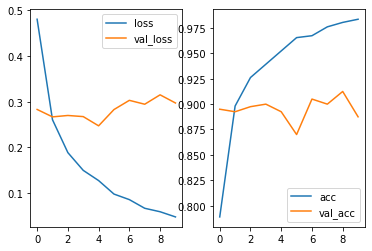

In [25]:
plt.subplot(1,2,1)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['loss', 'val_loss'])

plt.subplot(1,2,2)
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.legend(['acc', 'val_acc'])

### inception

In [43]:
from tensorflow.keras.applications.inception_v3 import InceptionV3, decode_predictions

In [44]:
base_model = InceptionV3(weights='imagenet', include_top=True)

In [45]:
base_model.summary()

Model: "inception_v3"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_6 (InputLayer)            [(None, 299, 299, 3) 0                                            
__________________________________________________________________________________________________
conv2d_188 (Conv2D)             (None, 149, 149, 32) 864         input_6[0][0]                    
__________________________________________________________________________________________________
batch_normalization_188 (BatchN (None, 149, 149, 32) 96          conv2d_188[0][0]                 
__________________________________________________________________________________________________
activation_188 (Activation)     (None, 149, 149, 32) 0           batch_normalization_188[0][0]    
_______________________________________________________________________________________

In [46]:
for i,layer in enumerate(base_model.layers):
    print(i, layer.name, layer.output_shape)

0 input_6 [(None, 299, 299, 3)]
1 conv2d_188 (None, 149, 149, 32)
2 batch_normalization_188 (None, 149, 149, 32)
3 activation_188 (None, 149, 149, 32)
4 conv2d_189 (None, 147, 147, 32)
5 batch_normalization_189 (None, 147, 147, 32)
6 activation_189 (None, 147, 147, 32)
7 conv2d_190 (None, 147, 147, 64)
8 batch_normalization_190 (None, 147, 147, 64)
9 activation_190 (None, 147, 147, 64)
10 max_pooling2d_8 (None, 73, 73, 64)
11 conv2d_191 (None, 73, 73, 80)
12 batch_normalization_191 (None, 73, 73, 80)
13 activation_191 (None, 73, 73, 80)
14 conv2d_192 (None, 71, 71, 192)
15 batch_normalization_192 (None, 71, 71, 192)
16 activation_192 (None, 71, 71, 192)
17 max_pooling2d_9 (None, 35, 35, 192)
18 conv2d_196 (None, 35, 35, 64)
19 batch_normalization_196 (None, 35, 35, 64)
20 activation_196 (None, 35, 35, 64)
21 conv2d_194 (None, 35, 35, 48)
22 conv2d_197 (None, 35, 35, 96)
23 batch_normalization_194 (None, 35, 35, 48)
24 batch_normalization_197 (None, 35, 35, 96)
25 activation_194 (None, 

In [47]:
base_model.get_layer('input_6').output_shape

[(None, 299, 299, 3)]

- Inception-v3 의 입력이미지는 299x299x3 이고,
- -1 ~ 1 사이의 실수값으로 전처리한다

In [48]:
img = keras.preprocessing.image.load_img('bird.jpg', target_size=(299,299))
bird = keras.preprocessing.image.img_to_array(bird)
bird = ((bird/255.)-0.5)*2

In [49]:
bird.shape, bird.max(), bird.min(), bird.dtype

((224, 224, 3), -0.99855065, -1.0154513, dtype('float32'))

In [50]:
out = base_model.predict(bird.reshape(1,299,299,3))

ValueError: cannot reshape array of size 150528 into shape (1,299,299,3)

## AutoEncoder
- https://blog.keras.io/building-autoencoders-in-keras.html
<img src='https://www.researchgate.net/profile/Xifeng_Guo/publication/320658590/figure/fig1/AS:614154637418504@1523437284408/The-structure-of-proposed-Convolutional-AutoEncoders-CAE-for-MNIST-In-the-middle-there.png'>
(출처: https://www.researchgate.net/figure/The-structure-of-proposed-Convolutional-AutoEncoders-CAE-for-MNIST-In-the-middle-there_fig1_320658590)"

### MNIST

In [51]:
from tensorflow.keras.datasets import mnist

(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [52]:
X_train = X_train.reshape(-1,28,28,1)/255
X_test = X_test.reshape(-1,28,28,1)/255

X_train.shape, X_test.shape, X_train[0].max(), X_train[0].dtype

((60000, 28, 28, 1), (10000, 28, 28, 1), 1.0, dtype('float64'))

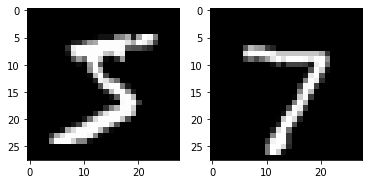

In [53]:
plt.subplot(1,2,1)
plt.imshow(X_train[0].reshape(28,28), cmap='gray')
#plt.imshow(X_train[0,:,:,0], cmap='gray')
plt.subplot(1,2,2)
plt.imshow(X_test[0].reshape(28,28), cmap='gray')

### 인코더 생성

In [54]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Conv2D, Flatten, Dense, Reshape, Conv2DTranspose

In [55]:
input = Input((28,28,1))

x = Conv2D(32, (3,3), strides=2, padding='same', activation='relu')(input)
x = Conv2D(64, (3,3), strides=2, padding='same', activation='relu')(x)
x = Conv2D(128, (3,3), strides=2, activation='relu')(x)

x = Flatten()(x)
latent = Dense(10)(x)

- 인코더의 출력은 10개의 벡터값이다.
- 이 값을 잠재공간벡터(latent vector) 라고 한다.
- 즉, 28*28*1 의 이미지를 10개의 숫자로 축약하였다.

In [56]:
encoder = Model(input, latent)

encoder.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_7 (InputLayer)         [(None, 28, 28, 1)]       0         
_________________________________________________________________
conv2d_282 (Conv2D)          (None, 14, 14, 32)        320       
_________________________________________________________________
conv2d_283 (Conv2D)          (None, 7, 7, 64)          18496     
_________________________________________________________________
conv2d_284 (Conv2D)          (None, 3, 3, 128)         73856     
_________________________________________________________________
flatten_1 (Flatten)          (None, 1152)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 10)                11530     
Total params: 104,202
Trainable params: 104,202
Non-trainable params: 0
_____________________________________________________

In [57]:
input2 = Input((10,))

x2 = Dense(3*3*128, activation='relu')(input2)
x2 = Reshape((3,3,128))(x2)

x2 = Conv2DTranspose(64, (3,3), strides=2, activation='relu')(x2)
x2 = Conv2DTranspose(32, (3,3), strides=2, padding='same', activation='relu')(x2)

output = Conv2DTranspose(1, (3,3), strides=2, padding='same', activation='relu')(x2)

- Conv2DTranspose 설명 : https://datascience.stackexchange.com/questions/6107/what-are-deconvolutional-layers
<img src='https://i.stack.imgur.com/YyCu2.gif' />
<img src='https://i.stack.imgur.com/f2RiP.gif' />

In [58]:
decoder = Model(input2, output)

decoder.summary()

Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_8 (InputLayer)         [(None, 10)]              0         
_________________________________________________________________
dense_3 (Dense)              (None, 1152)              12672     
_________________________________________________________________
reshape (Reshape)            (None, 3, 3, 128)         0         
_________________________________________________________________
conv2d_transpose (Conv2DTran (None, 7, 7, 64)          73792     
_________________________________________________________________
conv2d_transpose_1 (Conv2DTr (None, 14, 14, 32)        18464     
_________________________________________________________________
conv2d_transpose_2 (Conv2DTr (None, 28, 28, 1)         289       
Total params: 105,217
Trainable params: 105,217
Non-trainable params: 0
_____________________________________________________

### 오토 인코더 구성

In [59]:
autoencoder = Model(input, decoder(encoder(input)))

autoencoder.summary()

Model: "model_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_7 (InputLayer)         [(None, 28, 28, 1)]       0         
_________________________________________________________________
model_1 (Functional)         (None, 10)                104202    
_________________________________________________________________
model_2 (Functional)         (None, 28, 28, 1)         105217    
Total params: 209,419
Trainable params: 209,419
Non-trainable params: 0
_________________________________________________________________


In [60]:
autoencoder.compile(loss='mse', optimizer='adam', metrics=['acc'])

In [62]:
autoencoder.fit(X_train, X_train, batch_size=32,
                epochs=50, validation_data=(X_test, X_test))

Epoch 1/50
1875/1875 [==============================] - 20s 11ms/step - loss: 0.0150 - acc: 0.8116 - val_loss: 0.0140 - val_acc: 0.8109
Epoch 2/50
1875/1875 [==============================] - 24s 13ms/step - loss: 0.0137 - acc: 0.8121 - val_loss: 0.0132 - val_acc: 0.8117
Epoch 3/50
1875/1875 [==============================] - 26s 14ms/step - loss: 0.0129 - acc: 0.8124 - val_loss: 0.0128 - val_acc: 0.8111
Epoch 4/50
1875/1875 [==============================] - 29s 15ms/step - loss: 0.0123 - acc: 0.8126 - val_loss: 0.0121 - val_acc: 0.8116
Epoch 5/50
1875/1875 [==============================] - 28s 15ms/step - loss: 0.0119 - acc: 0.8128 - val_loss: 0.0120 - val_acc: 0.8117
Epoch 6/50
1875/1875 [==============================] - 28s 15ms/step - loss: 0.0116 - acc: 0.8129 - val_loss: 0.0117 - val_acc: 0.8116
Epoch 7/50
1875/1875 [==============================] - 28s 15ms/step - loss: 0.0114 - acc: 0.8130 - val_loss: 0.0115 - val_acc: 0.8119
Epoch 8/50
1875/1875 [==========================

### 평가

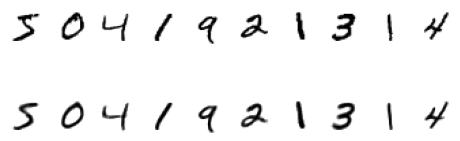

In [70]:
plt.figure(figsize=[8,3])

for i in range(10):
    r = autoencoder.predict(X_train[[i]])

    plt.subplot(2,10,1+i)
    plt.imshow(X_train[i,:,:,0], vmax=1, vmin=0, cmap='gray_r')
    plt.axis('off')

    plt.subplot(2,10,11+i)
    plt.imshow(r[0,:,:,0], vmax=1, vmin=0, cmap='gray_r')
    plt.axis('off')

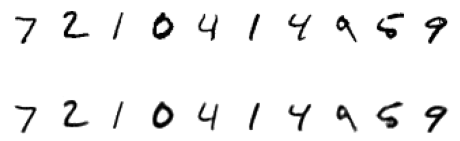

In [64]:
plt.figure(figsize=[8,3])

for i in range(10):
    r = autoencoder.predict(X_test[[i]])

    plt.subplot(2,10,1+i)
    plt.imshow(X_test[i,:,:,0], vmax=1, vmin=0, cmap='gray_r')
    plt.axis('off')

    plt.subplot(2,10,11+i)
    plt.imshow(r[0,:,:,0], vmax=1, vmin=0, cmap='gray_r')
    plt.axis('off')

### 시각화

In [65]:
latent_value = encoder.predict(X_train)

In [66]:
latent_value.shape

(60000, 10)

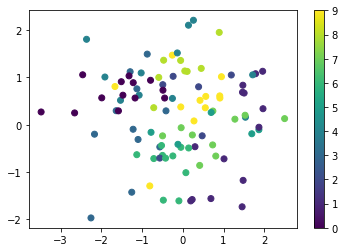

In [67]:
plt.scatter(latent_value[:100,0], latent_value[:100,1], c=y_train[:100])
plt.colorbar()

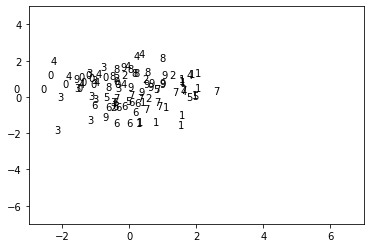

In [68]:
plt.axis([-3,7,-7,5])
for i in range(100):
    plt.text(latent_value[i,0], latent_value[i,1], str(y_train[i]))

## 빅데이터 활용 AI 설계

### DCGAN : MNIST
- GAN : Generative Adversarial Networks
- DCGAN : Deep Convolutional GAN
- Generator(생성자) / Discriminator(판별자)
<img src='https://wiki.pathmind.com/images/wiki/GANs.png' />

In [2]:
from tensorflow.keras.datasets import mnist

In [3]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [4]:
X_train = X_train/255
X_test = X_test/255

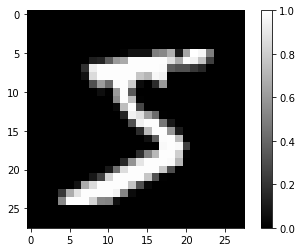

In [5]:
plt.imshow(X_train[0], cmap='gray')
plt.colorbar()

In [6]:
X_train = X_train[:,:,:,np.newaxis] # X_train.reshape(-1,28,28,1)
X_test = X_test[:,:,:,np.newaxis]

In [7]:
X_train.shape, X_train.dtype, X_train.max(), X_train.min()

((60000, 28, 28, 1), dtype('float64'), 1.0, 0.0)

In [8]:
X_test.shape

(10000, 28, 28, 1)

### 판별자 정의

In [9]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, Conv2D, Conv2DTranspose, \
    Flatten, Reshape, LeakyReLU, BatchNormalization, Activation
from tensorflow.keras.optimizers import RMSprop

In [10]:
input = Input((28,28,1))
x = LeakyReLU(alpha=0.2)(input)

x = Conv2D(32, (5,5), strides=2, padding='same')(x)
x = LeakyReLU(alpha=0.2)(x)

x = Conv2D(64, (5,5), strides=2, padding='same')(x)
x = LeakyReLU(alpha=0.2)(x)

x = Conv2D(128, (5,5), strides=2, padding='same')(x)
x = LeakyReLU(alpha=0.2)(x)

x = Conv2D(256, (5,5), strides=1, padding='same')(x)

x = Flatten()(x)
x = Dense(1, activation='sigmoid')(x)

discriminator = Model(input, x)
discriminator.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 28, 28, 1)]       0         
_________________________________________________________________
leaky_re_lu (LeakyReLU)      (None, 28, 28, 1)         0         
_________________________________________________________________
conv2d (Conv2D)              (None, 14, 14, 32)        832       
_________________________________________________________________
leaky_re_lu_1 (LeakyReLU)    (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 7, 7, 64)          51264     
_________________________________________________________________
leaky_re_lu_2 (LeakyReLU)    (None, 7, 7, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 4, 4, 128)         204928

<img src='https://www.researchgate.net/profile/Sepp_Hochreiter/publication/284579051/figure/fig1/AS:614057178578955@1523414048184/The-rectified-linear-unit-ReLU-the-leaky-ReLU-LReLU-a-01-the-shifted-ReLUs.png' />(출처: https://www.researchgate.net/figure/The-rectified-linear-unit-ReLU-the-leaky-ReLU-LReLU-a-01-the-shifted-ReLUs_fig1_284579051)

In [11]:
discriminator.compile(loss='binary_crossentropy',
                      optimizer=RMSprop(lr=2e-4, decay=6e-8), metrics=['acc'])
    # decay 값이 클수록 새롭게(처음으로) 변경되는 가중치를 많이 변화시킨다 (디폴트:0)

### 생성자 정의

In [12]:
input2 = Input((100,)) # 생성벡터는 100차원

x2 = Dense(7*7*128)(input2) # 랜덤 이미지가 입력됨

x2 = Reshape((7,7,128))(x2)

x2 = BatchNormalization()(x2)
x2 = Activation('relu')(x2)

x2 = Conv2DTranspose(128, (5,5), strides=2, padding='same')(x2)
x2 = BatchNormalization()(x2)
x2 = Activation('relu')(x2)

x2 = Conv2DTranspose(64, (5,5), strides=2, padding='same')(x2)
x2 = BatchNormalization()(x2)
x2 = Activation('relu')(x2)

x2 = Conv2DTranspose(32, (5,5), strides=1, padding='same')(x2)
x2 = BatchNormalization()(x2)
x2 = Activation('relu')(x2)

x2 = Conv2DTranspose(1, (5,5), strides=1, padding='same')(x2)
x2 = Activation('sigmoid')(x2)

generator = Model(input2, x2)
generator.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 100)]             0         
_________________________________________________________________
dense_1 (Dense)              (None, 6272)              633472    
_________________________________________________________________
reshape (Reshape)            (None, 7, 7, 128)         0         
_________________________________________________________________
batch_normalization (BatchNo (None, 7, 7, 128)         512       
_________________________________________________________________
activation (Activation)      (None, 7, 7, 128)         0         
_________________________________________________________________
conv2d_transpose (Conv2DTran (None, 14, 14, 128)       409728    
_________________________________________________________________
batch_normalization_1 (Batch (None, 14, 14, 128)       512 

### 적대망 정의
- 생성자로 생성한 이미지가 판별자에 의해 '실제이미지' 로 판별되도록 생성자의 가중치를 조절한다

In [13]:
discriminator.trainable = False # 모델들을 연결하여 새로운 모델을 만들 때만 적용된다

adversarial = Model(input2, discriminator(generator(input2)))
adversarial.summary()

Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 100)]             0         
_________________________________________________________________
model_1 (Functional)         (None, 28, 28, 1)         1301505   
_________________________________________________________________
model (Functional)           (None, 1)                 1080577   
Total params: 2,382,082
Trainable params: 1,300,801
Non-trainable params: 1,081,281
_________________________________________________________________


In [14]:
adversarial.compile(loss='binary_crossentropy',
            optimizer=RMSprop(lr=2e-4*0.5, decay=6e-8*0.5), metrics=['acc'])

### 훈련하기

- fake images: 0, real images: 1
-1 step 에 10초 정도 소요됨
-C:\khh\프로그래밍\CNN\gan_images 폴더에 'fake_9.png' 형태로 저장함
-생성자 모델을 'gan_mnist_generator_1000.h5' 로 저장함

In [15]:
from tensorflow.keras.preprocessing import image

batch_size = 64
logs = [] # d_loss,d_acc,a_loss,a_acc

for step in range(20): # 400
    indices = np.random.randint(0, len(X_train), size=batch_size)
    real_images = X_train[indices]
    
    gen_vectors = np.random.uniform(-1, 1, size=[batch_size,100])
    fake_images = generator.predict(gen_vectors)
    
    X = np.r_[real_images, fake_images] # [batch_size*2,32,32,1]
    y = np.r_[np.ones([batch_size,1]), np.zeros([batch_size,1])] # [batch_size*2,1]
        # fake: 0, real: 1
        
    ###########
    d_loss, d_acc = discriminator.train_on_batch(X, y)
    
    gen_vectors_2 = np.random.uniform(-1, 1, size=[batch_size,100])
    ###########
    a_loss, a_acc = adversarial.train_on_batch(gen_vectors_2, np.ones([batch_size,1]))
            # 타겟값을 모두 1로 놓는다
    
    logs.append([d_loss,d_acc,a_loss,a_acc])
    print('Step: %05d, ' % (step+1), logs[-1])
    
    if (step+1)%10 == 0:
        adversarial.save_weights('gan_mnist.h5')
    
        img = image.array_to_img(fake_images[0]*255., scale=False)
        img.save('gan_images/fake_'+str(step)+'.png')

Step: 00001,  [0.6930767297744751, 0.7109375, 0.8342908024787903, 0.0]
Step: 00002,  [0.6046462655067444, 0.8359375, 0.8981434106826782, 0.0]
Step: 00003,  [0.47952091693878174, 0.9140625, 0.7351081371307373, 0.0]
Step: 00004,  [0.33521318435668945, 0.9921875, 0.5872744917869568, 1.0]
Step: 00005,  [0.19477728009223938, 1.0, 0.07053002715110779, 1.0]
Step: 00006,  [0.22411179542541504, 1.0, 1.833061695098877, 0.0]
Step: 00007,  [0.24789324402809143, 0.9140625, 0.38718634843826294, 1.0]
Step: 00008,  [0.07020294666290283, 1.0, 0.19989997148513794, 1.0]
Step: 00009,  [0.05333720147609711, 1.0, 0.12520834803581238, 1.0]
Step: 00010,  [0.04204206168651581, 1.0, 0.08543989807367325, 1.0]


FileNotFoundError: [Errno 2] No such file or directory: 'gan_images/fake_9.png'